# Information Metrics

This notebooks runs information theory metrics on time series signals, including several entropy measures. 

This notebook includes:
- approximate entropy
- sample entropy
- permutation entropy
- weighted permutation entropy

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import app_entropy, sample_entropy, perm_entropy, wperm_entropy
from apm.methods.settings import (AP_ENT_PARAMS, SA_ENT_PARAMS,
                                  PE_ENT_PARAMS, WPE_ENT_PARAMS)
from apm.plts.sims import plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.sim.examples import get_examples, check_examples
from apm.sim.settings import N_SIMS
from apm.sim.defs import SIM_ITERS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '25_entropy'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [5]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

In [6]:
# Define structure for precomputed simulation file name
sim_file = 'ts_sims_{}_' + str(SIM_ITERS.fs)

In [7]:
# Set the random seed
set_random_seed(111)

In [8]:
# Define collection of example signals
examples = get_examples()

## Entropy Measures

In [9]:
# Check settings for entropy measures
print('Approximate Entropy:\t', AP_ENT_PARAMS)
print('Sample Entropy: \t', SA_ENT_PARAMS)
print('Permutation Entropy:\t', PE_ENT_PARAMS)
print('WPermutation Entropy:\t', WPE_ENT_PARAMS)

Approximate Entropy:	 {'order': 2}
Sample Entropy: 	 {'order': 2}
Permutation Entropy:	 {'order': 3, 'delay': 1}
WPermutation Entropy:	 {'order': 3, 'delay': 1}


### Calculating Entropy Measures on Example Signals

Entropy measures generally measure the level of 'randomness' or complexity in a signal. 

In all cases, smaller values of measured entropy indicate more regular time series. 

In [10]:
# Check the calculated approximate entropy across some example signals
check_examples(examples, app_entropy, AP_ENT_PARAMS, 'approximate entropy')

Computed approximate entropy:
  powerlaw       : 	 1.9050
  synaptic       : 	 1.9387
  knee           : 	 1.6985
  oscillation    : 	 0.1842
  burst          : 	 0.1081
  combined       : 	 1.7746
  comb_burst     : 	 1.8253
  comb_peak      : 	 1.7808


In [11]:
# Check the calculated sample entropy across some example signals
check_examples(examples, sample_entropy, SA_ENT_PARAMS, 'sample entropy')

Computed sample entropy:
  powerlaw       : 	 1.8611
  synaptic       : 	 1.9033
  knee           : 	 1.6268
  oscillation    : 	 0.2815
  burst          : 	 0.0267
  combined       : 	 1.7109
  comb_burst     : 	 1.7600
  comb_peak      : 	 1.7061


In [12]:
# Check the calculated permutation entropy across some example signals
check_examples(examples, perm_entropy, PE_ENT_PARAMS, 'permutation entropy')

Computed permutation entropy:
  powerlaw       : 	 2.5664
  synaptic       : 	 2.5496
  knee           : 	 2.4861
  oscillation    : 	 1.4010
  burst          : 	 1.1077
  combined       : 	 2.5515
  comb_burst     : 	 2.5549
  comb_peak      : 	 2.5551


In [13]:
# Check the calculated weighted permutation entropy across some example signals
check_examples(examples, wperm_entropy, WPE_ENT_PARAMS, 'weighted permutation entropy')

Computed weighted permutation entropy:
  powerlaw       : 	 0.9634
  synaptic       : 	 0.9404
  knee           : 	 0.8551
  oscillation    : 	 0.3930
  burst          : 	 0.4080
  combined       : 	 0.9552
  comb_burst     : 	 0.9609
  comb_peak      : 	 0.9542


## Approximate Entropy

Approximate entropy quantifies the unpredictability of a time series.

#### Aperiodic Variations

In [14]:
# Run simulations calculating approximate entropy across exponents
ap_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], app_entropy, AP_ENT_PARAMS, N_SIMS)

In [15]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], app_entropy, AP_ENT_PARAMS, N_SIMS)

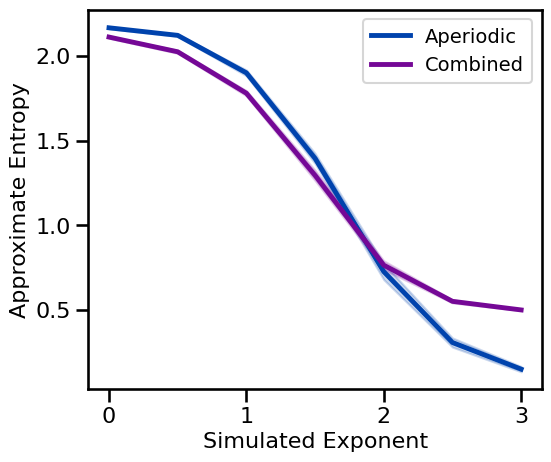

In [16]:
# Plot approximate entropy measures across aperiodic variations
plot_ap_sims(ap_sims_exp, ap_sims_comb, 'Approximate Entropy', **fsaver('ap_ap'))

#### Periodic Variations

In [17]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], app_entropy, AP_ENT_PARAMS, N_SIMS)

In [18]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], app_entropy, AP_ENT_PARAMS, N_SIMS)

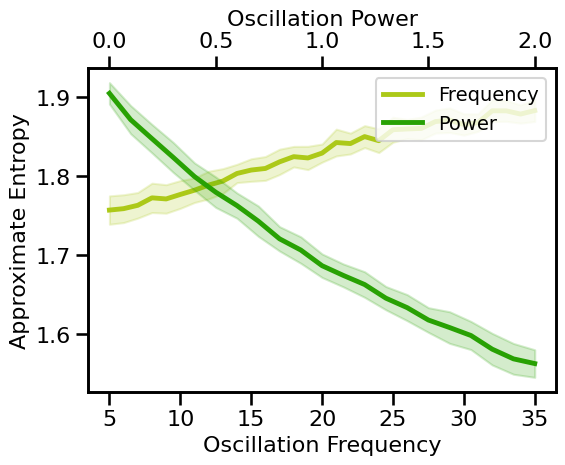

In [19]:
# Plot approximate entropy measures across aperiodic variations
plot_pe_sims(ap_sims_freq, ap_sims_pow, 'Approximate Entropy', **fsaver('ap_pe'))

#### Knee Variations

In [20]:
# Run simulations calculating approximate entropy across timescales
ap_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                           app_entropy, AP_ENT_PARAMS, N_SIMS)

In [21]:
# Run simulations calculating approximate exntropy across different knee parameters (sims from file)
ap_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'), app_entropy, AP_ENT_PARAMS)

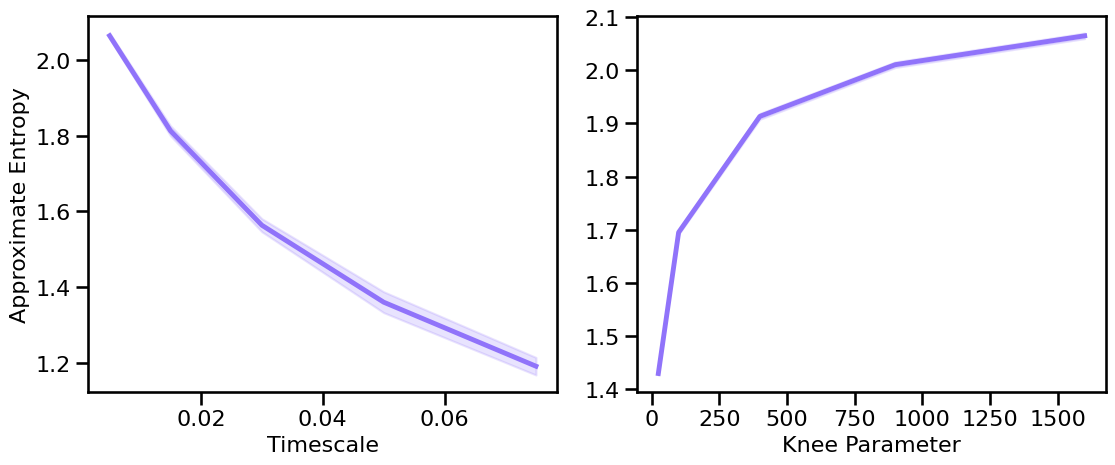

In [22]:
# Plot the estimated approximate entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, ap_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, ap_sims_knee, 'Knee Parameter',
              ylabel='Approximate Entropy', color=COLORS['KN'], **fsaver('ap_kn_vars'))

#### Peak Variations

In [23]:
# Run simulations calculating approximate entropy across peak bandwidths (sims from file)
ap_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'), app_entropy, AP_ENT_PARAMS)

In [24]:
# Run simulations calculating approximate entropy across burst probabilities
ap_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], app_entropy, AP_ENT_PARAMS, N_SIMS)

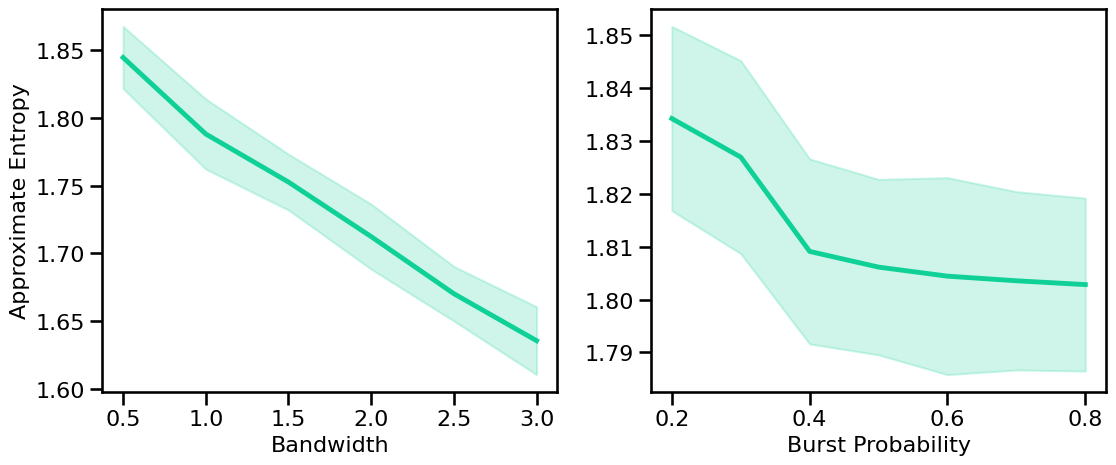

In [25]:
# Plot the estimated approximate entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, ap_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, ap_sims_burst, 'Burst Probability',
              ylabel='Approximate Entropy', color=COLORS['BW'], **fsaver('ap_pe_vars'))

## Sample Entropy

Sample entropy is a modification of approxmiate entropy for physiological time series.

The modifications of sample entropy make it data length independent.

#### Aperiodic Variations

In [26]:
# Run simulations calculating sample entropy across exponents
sa_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

In [27]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

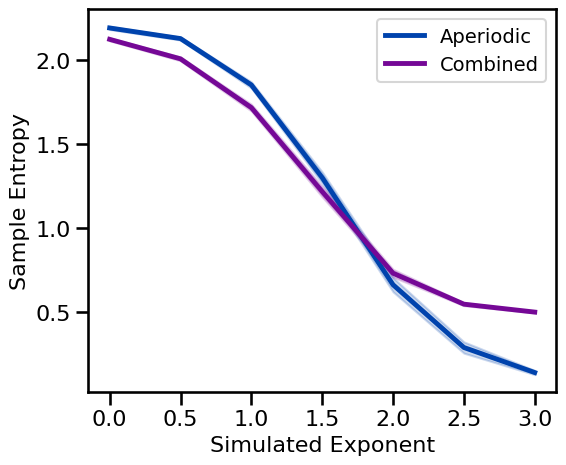

In [28]:
# Plot sample entropy measures across aperiodic variations
plot_ap_sims(sa_sims_exp, sa_sims_comb, 'Sample Entropy', **fsaver('sa_ap'))

#### Periodic Variations

In [29]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq = run_sims(\
    sim_combined, SIM_ITERS['osc_freq'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

In [30]:
# Run simulations calculating sample entropy across oscillation power
sa_sims_pow = run_sims(\
    sim_combined, SIM_ITERS['osc_pow'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

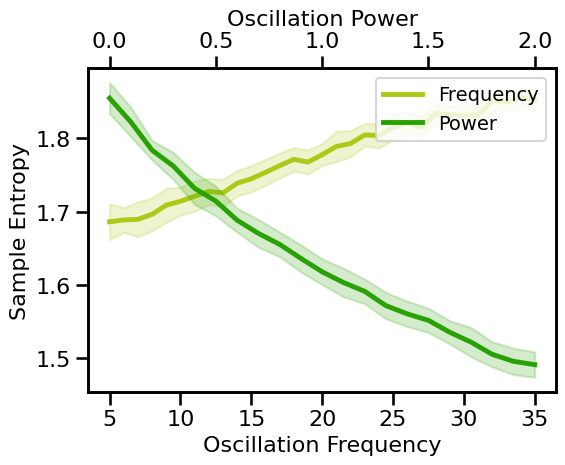

In [31]:
# Plot sample entropy measures across periodic variations
plot_pe_sims(sa_sims_freq, sa_sims_pow, 'Sample Entropy', **fsaver('sa_pe'))

#### Knee Variations

In [32]:
# Run simulations calculating sample entropy across timescales
sa_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                           sample_entropy, SA_ENT_PARAMS, N_SIMS)

In [33]:
# Run simulations calculating sample exntropy across different knee parameters (sims from file)
sa_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'), sample_entropy, SA_ENT_PARAMS)

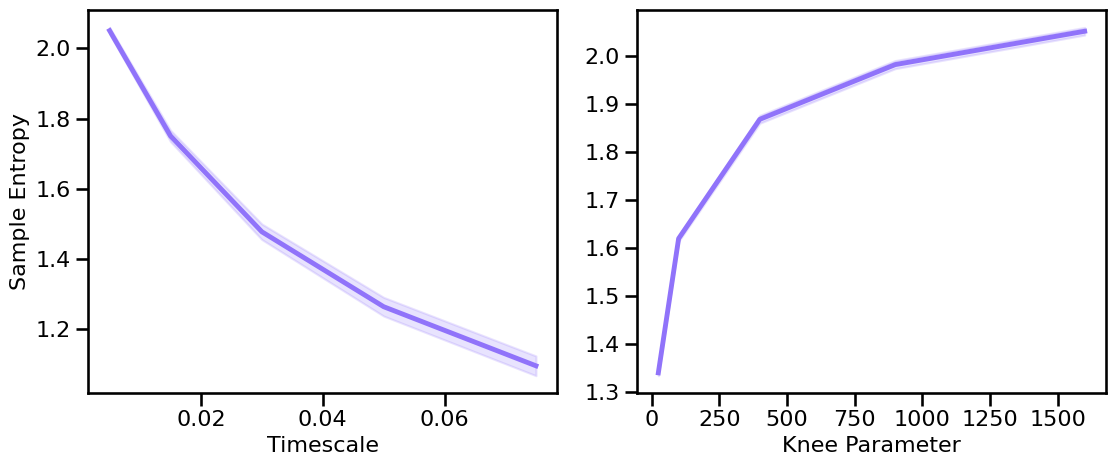

In [34]:
# Plot the estimated sample entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, sa_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, sa_sims_knee, 'Knee Parameter',
              ylabel='Sample Entropy', color=COLORS['KN'], **fsaver('sa_kn_vars'))

#### Peak Variations

In [35]:
# Run simulations calculating sample entropy across peak bandwidths (sims from file)
sa_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'),
                           sample_entropy, SA_ENT_PARAMS)

In [36]:
# Run simulations calculating sample entropy across burst probabilities
sa_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'],
                         sample_entropy, SA_ENT_PARAMS, N_SIMS)

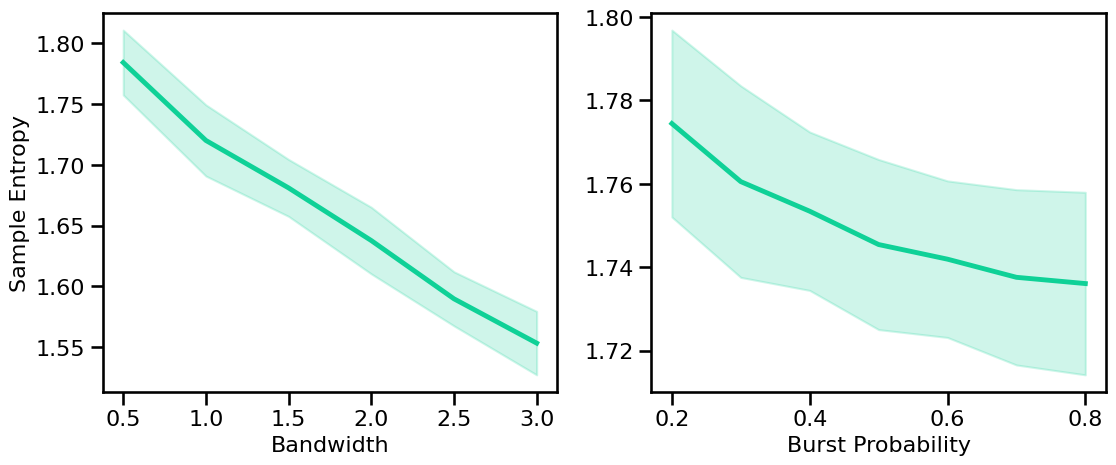

In [37]:
# Plot the estimated sample entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, sa_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, sa_sims_burst, 'Burst Probability',
              ylabel='Sample Entropy', color=COLORS['BW'], **fsaver('sa_pe_vars'))

## Permutation Entropy

Permutation entropy is a measure of entropy based on the probabilities of sequences within the time series.

Permutation entropy was introduced in 2002 by Bandt & Pompe.

#### Aperiodic Variations

In [38]:
# Run simulations calculating permutation entropy across exponents
pe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

In [39]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

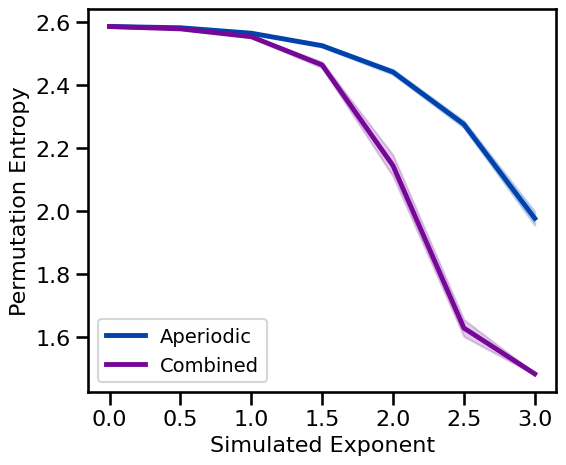

In [40]:
# Plot permutation entropy measures across periodic variations
plot_ap_sims(pe_sims_exp, pe_sims_comb, 'Permutation Entropy', **fsaver('pe_ap'))

#### Periodic Variations

In [41]:
# Run simulations calculating permutation entropy across oscillation frequency
pe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'],
                        perm_entropy, PE_ENT_PARAMS, N_SIMS)

In [42]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'],
                       perm_entropy, PE_ENT_PARAMS, N_SIMS)

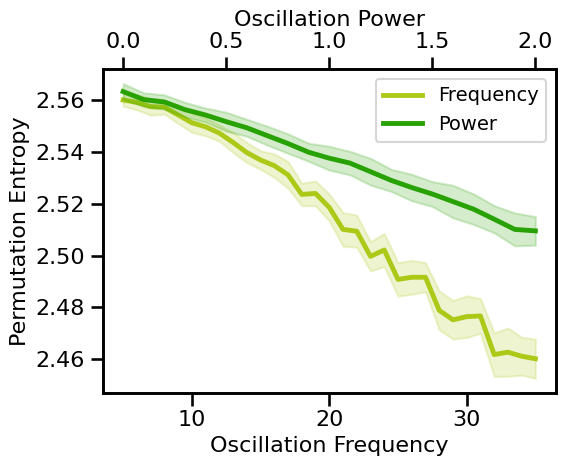

In [43]:
# Plot permutation entropy measures across periodic variations
plot_pe_sims(pe_sims_freq, pe_sims_pow, 'Permutation Entropy', **fsaver('pe_pe'))

#### Knee Variations

In [44]:
# Run simulations calculating permutation entropy across timescales
pe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                           perm_entropy, PE_ENT_PARAMS, N_SIMS)

In [45]:
# Run simulations calculating permutation entropy across different knee parameters (sims from file)
pe_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'),
                             perm_entropy, PE_ENT_PARAMS)

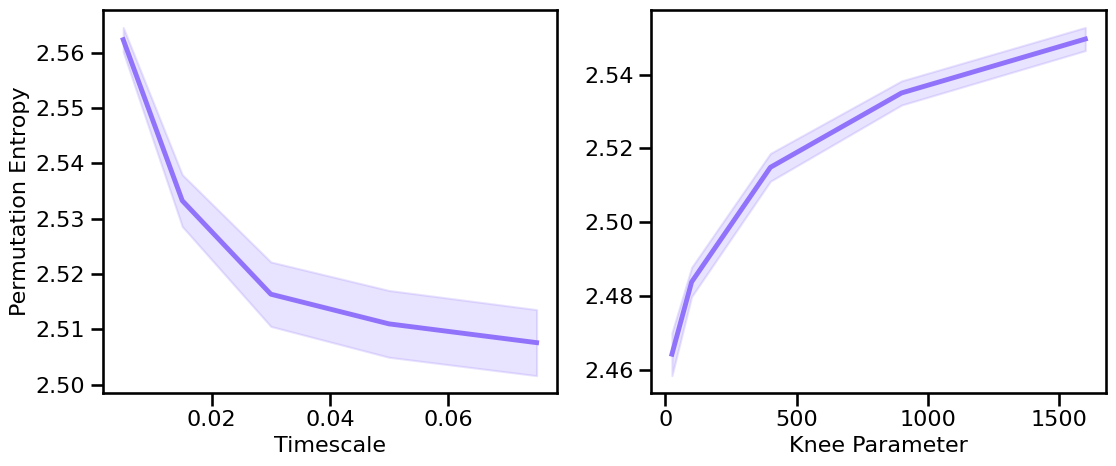

In [46]:
# Plot the estimated permutation entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, pe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, pe_sims_knee, 'Knee Parameter',
              ylabel='Permutation Entropy', color=COLORS['KN'], **fsaver('pe_kn_vars'))

#### Peak Variations

In [47]:
# Run simulations calculating permutation entropy across peak bandwidths (sims from file)
pe_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'),
                           perm_entropy, PE_ENT_PARAMS)

In [48]:
# Run simulations calculating permutation entropy across burst probabilities
pe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'],
                         perm_entropy, PE_ENT_PARAMS, N_SIMS)

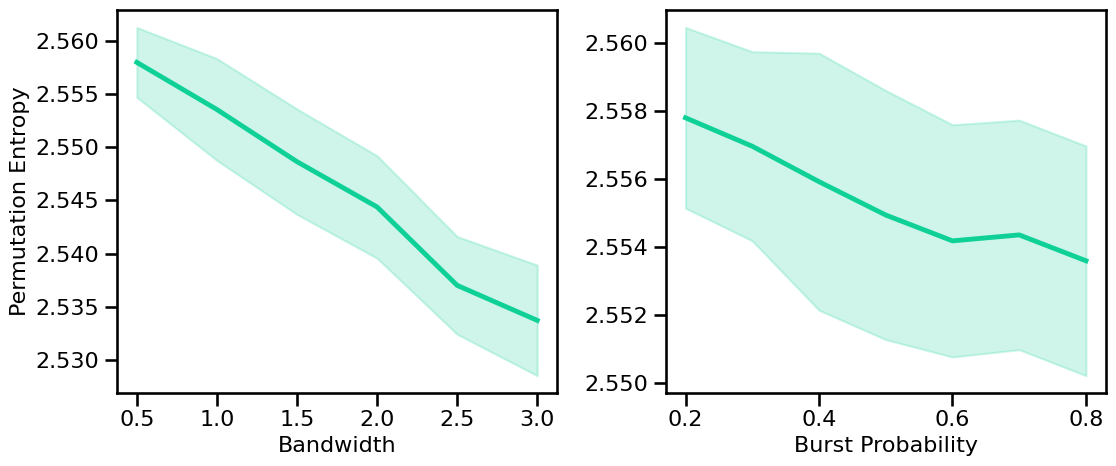

In [49]:
# Plot the estimated permutation entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, pe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, pe_sims_burst, 'Burst Probability',
              ylabel='Permutation Entropy', color=COLORS['BW'], **fsaver('pe_pe_vars'))

## Weighted Permutation Entropy

#### Aperiodic Variations

In [50]:
# Run simulations calculating weighted permutation entropy across exponents
wpe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'],
                        wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

In [51]:
# Run simulations calculating weighted permutation entropy across exponents, with an oscillation
wpe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'],
                         wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

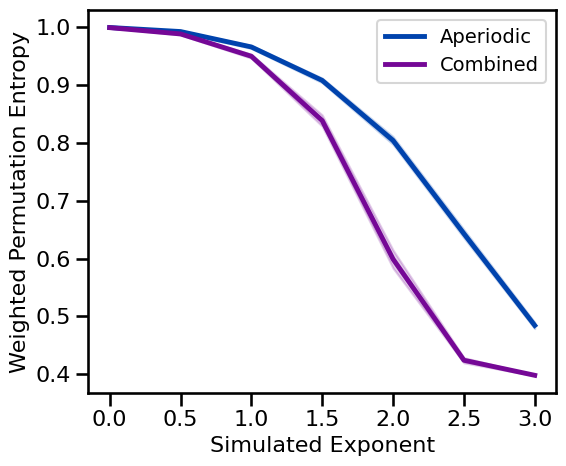

In [52]:
# Plot weighted permutation entropy measures across periodic variations
plot_ap_sims(wpe_sims_exp, wpe_sims_comb, 'Weighted Permutation Entropy', **fsaver('wpe_ap'))

#### Periodic Variations

In [53]:
# Run simulations calculating weighted permutation entropy across oscillation frequency
wpe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'],
                         wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

In [54]:
# Run simulations calculating weighted permutation entropy across oscillation power
wpe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'],
                        wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

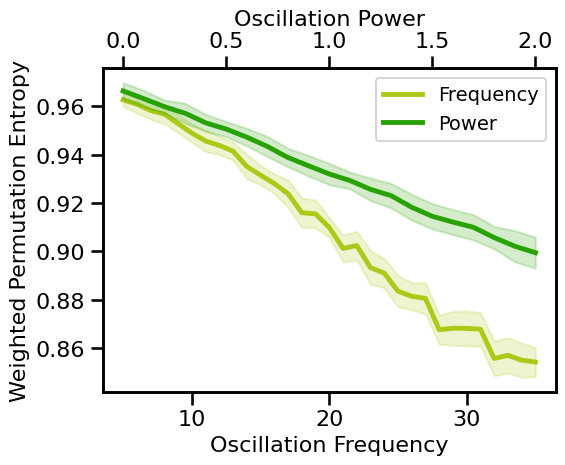

In [55]:
# Plot weighted permutation entropy measures across periodic variations
plot_pe_sims(wpe_sims_freq, wpe_sims_pow, 'Weighted Permutation Entropy', **fsaver('wpe_pe'))

#### Knee Variations

In [56]:
# Run simulations calculating weighted permutation entropy across timescales
wpe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

In [57]:
# Run simulations calculating weighted permutation exntropy across knee parameters (sims from file)
wpe_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'),
                              wperm_entropy, WPE_ENT_PARAMS)

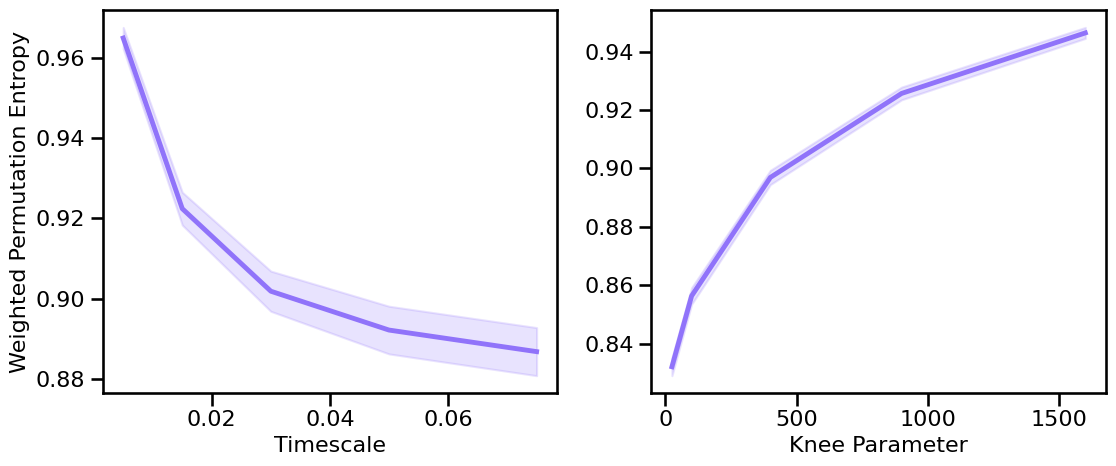

In [58]:
# Plot the estimated weighted permutation entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, wpe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, wpe_sims_knee, 'Knee Parameter',
              ylabel='Weighted Permutation Entropy', color=COLORS['KN'], **fsaver('wpe_kn_vars'))

#### Peak Variations

In [59]:
# Run simulations calculating weighted permutation entropy across peak bandwidths (sims from file)
wpe_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'),
                            wperm_entropy, WPE_ENT_PARAMS)

In [60]:
# Run simulations calculating weighted permutation entropy across burst probabilities
wpe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'],
                          wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

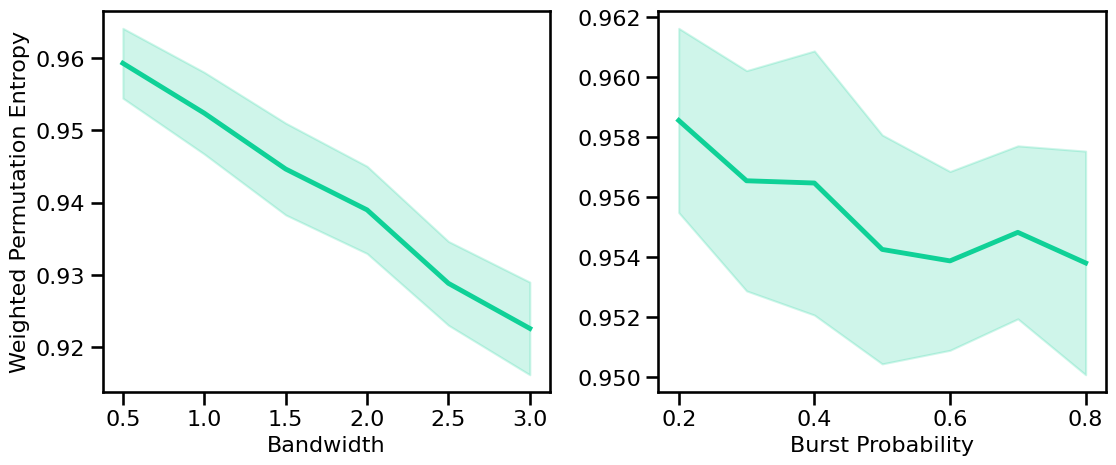

In [61]:
# Plot the estimated weighted permutation entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, wpe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, wpe_sims_burst, 'Burst Probability',
              ylabel='Weighted Permutation Entropy', color=COLORS['BW'], **fsaver('wpe_pe_vars'))

## Conclusions

Overall, we can see the following patterns in these simulations:

Entropy (general patterns across all):
- Entropy increases for decreasing aperiodic exponents, non-linearly
- Entropy decreases for increasing oscillatory power, approximately linearly